In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

# from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#Read data and encode
ds1 = r"C:\Users\phuct\Downloads\Personal Project\BA made easy\App Survey (Responses) - Form Responses 1.csv"
df1 = pd.read_csv(ds1,encoding='ISO-8859-1')
df1

,Timestamp,How old are you,What is your gender,What region are you from,Any feedback on user interface\n,General experience with this app,Would you recommend this app to friends or family?,What do you like most about the app concept?,What do you think are the missing features?
0,1/30/2024 2:54:37,18,Female,Vietnam,not really,Very good,Yes,"The design, and itâs easy to use",NaN
1,1/30/2024 2:55:20,19,male,Vietnam,no,Very good,Yes,pretty good,nothing
2,1/30/2024 3:07:23,18,male,asia,perfectly fine,Very good,Yes,all of the features,none
3,1/30/2024 3:41:18,19,male,Viet Nam,no,Very good,Maybe,.,NaN
4,1/30/2024 3:41:26,19,Male,North region of Vietnam?,Nope,Good,Yes,Updating news relating to technology,I donât know
5,1/30/2024 5:20:28,28,Female,"Victoria, Australia",Clear user interface.,Good,Yes,the chat bot,NaN
6,1/30/2024 9:11:37,19,Female,Asia,Design,Good,Yes,It's about technology,NaN
7,1/30/2024 11:16:11,39,F,Mel,Good,Neutral,No,Arrangements,Story telling
8,1/30/2024 12:36:31,18,Male,Vietnam,"Look good, app is well designed",Neutral,Maybe,Assistant feature,1. Directly scan modem from the app; 2. Find t...
9,1/30/2024 16:23:26,19,male,long bien,"looks too simple, which is good, but should st...",Neutral,Yes,"the simplicity, the effort you put in",none that i can think of :P


## Data Exploration 

In [2]:
df1.shape

(12, 9)

In [3]:
df1.head()

,Timestamp,How old are you,What is your gender,What region are you from,Any feedback on user interface\n,General experience with this app,Would you recommend this app to friends or family?,What do you like most about the app concept?,What do you think are the missing features?
0,1/30/2024 2:54:37,18,Female,Vietnam,not really,Very good,Yes,"The design, and itâs easy to use",NaN
1,1/30/2024 2:55:20,19,male,Vietnam,no,Very good,Yes,pretty good,nothing
2,1/30/2024 3:07:23,18,male,asia,perfectly fine,Very good,Yes,all of the features,none
3,1/30/2024 3:41:18,19,male,Viet Nam,no,Very good,Maybe,.,NaN
4,1/30/2024 3:41:26,19,Male,North region of Vietnam?,Nope,Good,Yes,Updating news relating to technology,I donât know


In [4]:
#Univaraiate analysis
df1.describe()

,How old are you
count,12.000000
mean,20.750000
std,6.552238
min,14.000000
25%,18.000000
50%,19.000000
75%,19.000000
max,39.000000


In [5]:
#Variable Identification
df1.dtypes

Timestamp                                             object
How old are you                                        int64
What is your gender                                   object
What region are you from                              object
Any feedback on user interface\n                      object
General experience with this app                      object
Would you recommend this app to friends or family?    object
What do you like most about the app concept?          object
What do you think are the missing features?           object
dtype: object

## Data Preprocessing

In [6]:
df1['What is your gender'] = df1['What is your gender'].replace(['female', 'Female'], 'F')
df1['What is your gender'] = df1['What is your gender'].replace(['male', 'Male', 'Male '], 'M')
df1['What region are you from'] = df1['What region are you from'].replace(['Viet Nam','vietnam','Vietnam', 'asia', 'North region of Vietnam?','long bien'], 'Asia')
df1['What region are you from'] = df1['What region are you from'].replace(['Victoria, Australia', 'Mel'], 'Oceania ')
df1

,Timestamp,How old are you,What is your gender,What region are you from,Any feedback on user interface\n,General experience with this app,Would you recommend this app to friends or family?,What do you like most about the app concept?,What do you think are the missing features?
0,1/30/2024 2:54:37,18,F,Asia,not really,Very good,Yes,"The design, and itâs easy to use",NaN
1,1/30/2024 2:55:20,19,M,Asia,no,Very good,Yes,pretty good,nothing
2,1/30/2024 3:07:23,18,M,Asia,perfectly fine,Very good,Yes,all of the features,none
3,1/30/2024 3:41:18,19,M,Asia,no,Very good,Maybe,.,NaN
4,1/30/2024 3:41:26,19,M,Asia,Nope,Good,Yes,Updating news relating to technology,I donât know
5,1/30/2024 5:20:28,28,F,Oceania,Clear user interface.,Good,Yes,the chat bot,NaN
6,1/30/2024 9:11:37,19,F,Asia,Design,Good,Yes,It's about technology,NaN
7,1/30/2024 11:16:11,39,F,Oceania,Good,Neutral,No,Arrangements,Story telling
8,1/30/2024 12:36:31,18,M,Asia,"Look good, app is well designed",Neutral,Maybe,Assistant feature,1. Directly scan modem from the app; 2. Find t...
9,1/30/2024 16:23:26,19,M,Asia,"looks too simple, which is good, but should st...",Neutral,Yes,"the simplicity, the effort you put in",none that i can think of :P


In [7]:
for i in range(len(df1)):
    if df1.loc[i, 'How old are you '] < 24:
        df1.loc[i, 'How old are you '] = "Youth" 
    elif df1.loc[i, 'How old are you '] >= 25:
        df1.loc[i, 'How old are you '] = "Adults"
df1

,Timestamp,How old are you,What is your gender,What region are you from,Any feedback on user interface\n,General experience with this app,Would you recommend this app to friends or family?,What do you like most about the app concept?,What do you think are the missing features?
0,1/30/2024 2:54:37,Youth,F,Asia,not really,Very good,Yes,"The design, and itâs easy to use",NaN
1,1/30/2024 2:55:20,Youth,M,Asia,no,Very good,Yes,pretty good,nothing
2,1/30/2024 3:07:23,Youth,M,Asia,perfectly fine,Very good,Yes,all of the features,none
3,1/30/2024 3:41:18,Youth,M,Asia,no,Very good,Maybe,.,NaN
4,1/30/2024 3:41:26,Youth,M,Asia,Nope,Good,Yes,Updating news relating to technology,I donât know
5,1/30/2024 5:20:28,Adults,F,Oceania,Clear user interface.,Good,Yes,the chat bot,NaN
6,1/30/2024 9:11:37,Youth,F,Asia,Design,Good,Yes,It's about technology,NaN
7,1/30/2024 11:16:11,Adults,F,Oceania,Good,Neutral,No,Arrangements,Story telling
8,1/30/2024 12:36:31,Youth,M,Asia,"Look good, app is well designed",Neutral,Maybe,Assistant feature,1. Directly scan modem from the app; 2. Find t...
9,1/30/2024 16:23:26,Youth,M,Asia,"looks too simple, which is good, but should st...",Neutral,Yes,"the simplicity, the effort you put in",none that i can think of :P


# Gender

([<matplotlib.patches.Wedge at 0x2c323a96c50>,
 [Text(-0.28470088329267024, 1.062518426688391, 'M'),
  Text(0.28470078381251407, -1.0625184533440069, 'F')],
 [Text(-0.15529139088691102, 0.579555505466395, '58%'),
  Text(0.15529133662500766, -0.5795555200058218, '42%')])

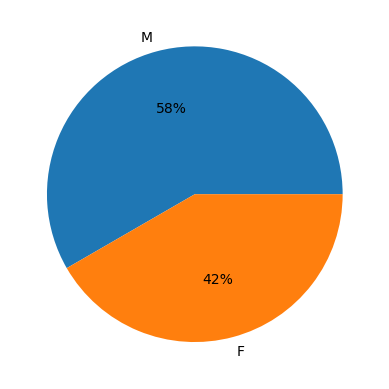

In [8]:
plt.pie(df1['What is your gender'].value_counts(), autopct='%.0f%%', labels = ['M','F'])

# Region

([<matplotlib.patches.Wedge at 0x2c323b02e90>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Asia'),
  Text(0.9526278840857078, -0.5500001040567061, 'Oceania')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83%'),
  Text(0.519615209501295, -0.30000005675820324, '17%')])

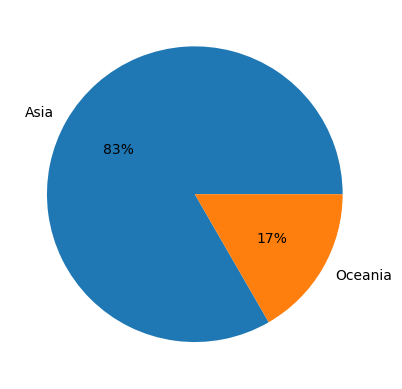

In [9]:
plt.pie(df1['What region are you from'].value_counts(), autopct='%.0f%%', labels = ['Asia','Oceania'])
# print(df1.columns)

# Age

([<matplotlib.patches.Wedge at 0x2c323b55890>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Youth'),
  Text(0.9526278840857078, -0.5500001040567061, 'Adult')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83%'),
  Text(0.519615209501295, -0.30000005675820324, '17%')])

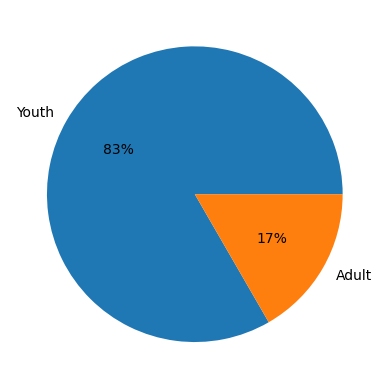

In [10]:
plt.pie(df1['How old are you '].value_counts(), autopct='%.0f%%', labels = ['Youth','Adult'])

# Recommendation

([<matplotlib.patches.Wedge at 0x2c323ba5790>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Yes'),
  Text(0.5500000148652437, -0.9526279355804299, 'Maybe'),
  Text(1.0625184200244853, -0.2847009081627096, 'No')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75%'),
  Text(0.30000000810831473, -0.5196152375893254, '17%'),
  Text(0.5795555018315374, -0.15529140445238704, '8%')])

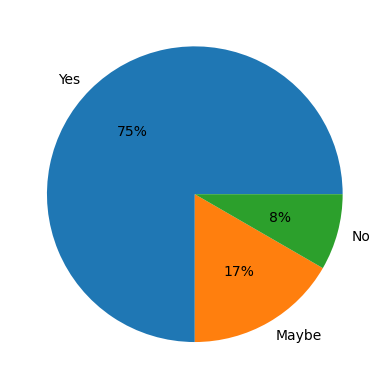

In [11]:
plt.pie(df1['Would you recommend this app to friends or family?'].value_counts(), autopct='%.0f%%', labels = ['Yes','Maybe','No'])

In [12]:
# df1.to_csv(r'C:\Users\phuct\Downloads\Personal Project\BA made easy\App Survey (Responses) - Form Responses 1.csv', index=False)
